In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option("display.float_format", "{:,.2f}".format)

In [54]:
import os

os.chdir(r"C:\Users\mutha\Downloads")

df = pd.read_csv("statistics_sales_project_data.csv")

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1200 non-null   object 
 1   store_type          1200 non-null   object 
 2   region              1200 non-null   object 
 3   marketing_campaign  1200 non-null   object 
 4   units_sold          1200 non-null   int64  
 5   revenue             1200 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 56.4+ KB


(         date store_type       region marketing_campaign  units_sold   revenue
 0  2023-01-01     Online      Western                Yes           6 11,876.03
 1  2023-01-02   Physical  Rift Valley                Yes           8 14,333.00
 2  2023-01-03   Physical      Western                 No           4  8,101.97
 3  2023-01-04   Physical        Coast                 No           8 10,928.92
 4  2023-01-05     Online      Nairobi                 No           9 18,166.40,
 None)

In [57]:
# PART 1: Descriptive Statistics
revenue = df["revenue"]

mean_rev = revenue.mean()
median_rev = revenue.median()
mode_rev = revenue.mode()[0]


mean_rev, median_rev, mode_rev

(np.float64(8271.974), 7723.325, np.float64(0.0))

In [58]:
range_rev = revenue.max() - revenue.min()
variance_rev = revenue.var()
std_rev = revenue.std()

range_rev, variance_rev, std_rev

(26885.87, 18318070.17279819, 4279.961468611393)

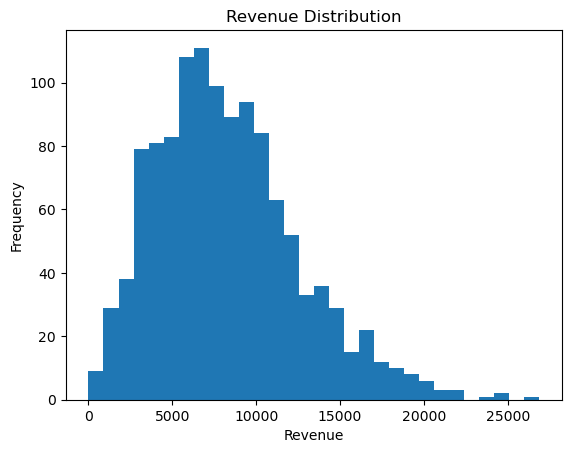

(np.float64(0.7480876054540505), np.float64(0.6061887540176385))

In [59]:
# Histogram of revenue
plt.figure()
plt.hist(revenue, bins=30)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Revenue Distribution")
plt.show()

stats.skew(revenue), stats.kurtosis(revenue)


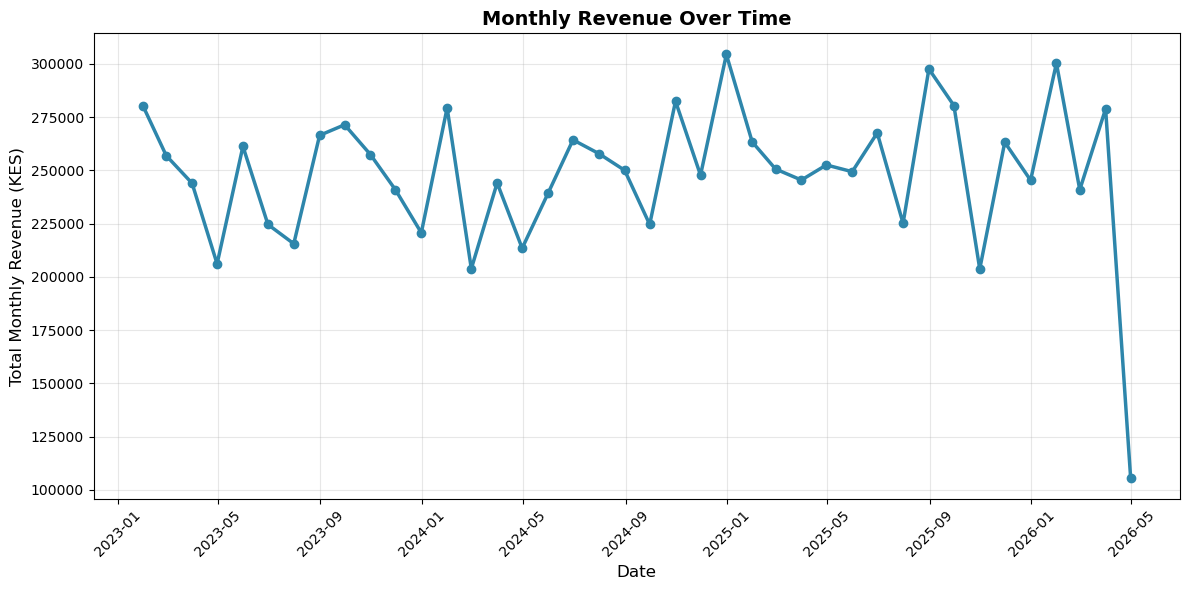

In [61]:
# Line chart
# Aggregate to monthly revenue
df['date'] = pd.to_datetime(df['date'])
monthly_revenue = df.resample('ME', on='date')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['date'], monthly_revenue['revenue'], 
         marker='o', linewidth=2.5, markersize=6, color='#2E86AB')
plt.title("Monthly Revenue Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Monthly Revenue (KES)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

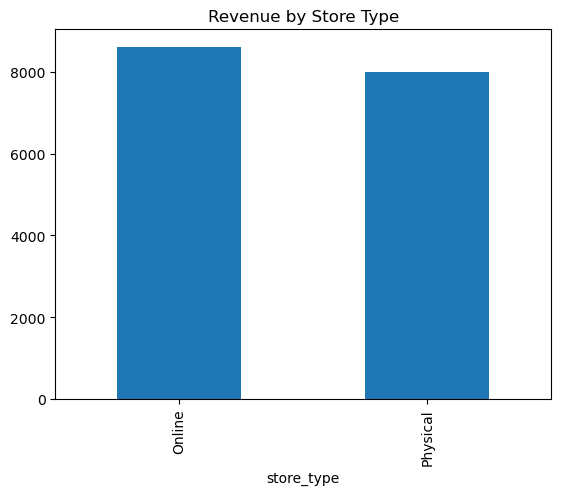

In [62]:
# Bar chart
df.groupby('store_type')['revenue'].mean().plot(kind='bar', title='Revenue by Store Type')
plt.show()


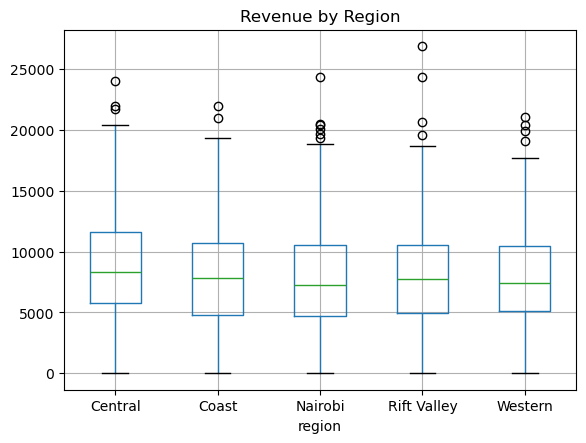

In [63]:
# Box plot
df.boxplot(column='revenue', by='region')
plt.title("Revenue by Region")
plt.suptitle("")
plt.show()

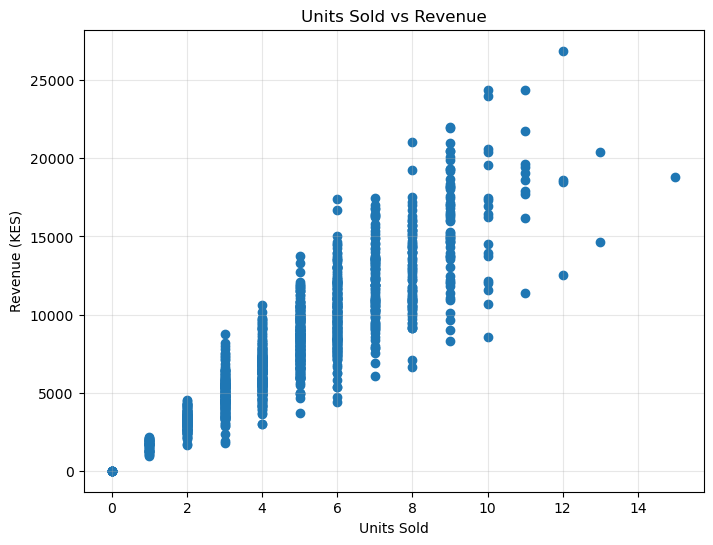

In [67]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['units_sold'], df['revenue'])
plt.title("Units Sold vs Revenue")
plt.xlabel("Units Sold")
plt.ylabel("Revenue (KES)")
plt.grid(True, alpha=0.3)
plt.show()

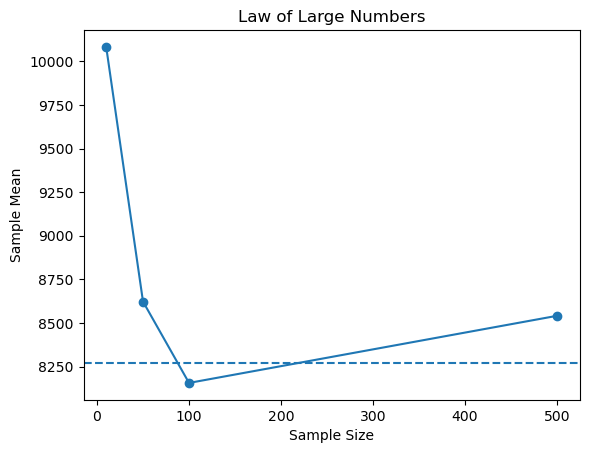

In [68]:
# Law of Large Numbers
sample_sizes = [10, 50, 100, 500]
means = []

for n in sample_sizes:
    means.append(revenue.sample(n).mean())

plt.plot(sample_sizes, means, marker='o')
plt.axhline(mean_rev, linestyle='--')
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.title("Law of Large Numbers")
plt.show()

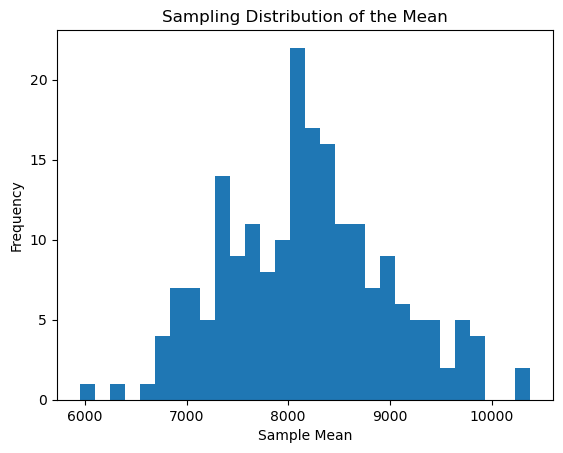

In [69]:
# Central Limit Theorem
sample_means = [revenue.sample(30).mean() for _ in range(200)]

plt.hist(sample_means, bins=30)
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [70]:
# Hypothesis Testing – Marketing Campaign
campaign = df[df['marketing_campaign'] == 'Yes']['revenue']
no_campaign = df[df['marketing_campaign'] == 'No']['revenue']

t_stat, p_value = stats.ttest_ind(campaign, no_campaign, alternative='greater')
t_stat, p_value


(np.float64(4.434274857534006), np.float64(5.043041819050511e-06))

In [71]:
# Effect Size – Cohen's d
mean_diff = campaign.mean() - no_campaign.mean()
pooled_std = np.sqrt((campaign.std()**2 + no_campaign.std()**2) / 2)
cohens_d = mean_diff / pooled_std

cohens_d

np.float64(0.2617714911531112)